In [2]:
# pip install numpy matplotlib tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


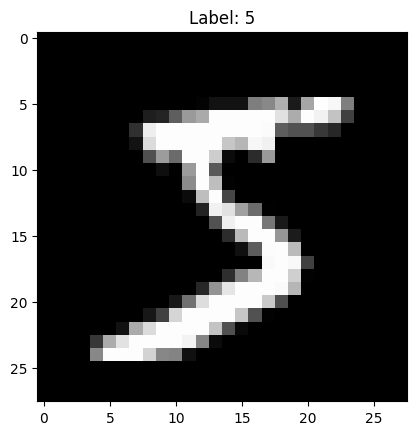

In [5]:
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattens the 28x28 image to a 784-element array
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for 10 digit classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8610 - loss: 0.4909 - val_accuracy: 0.9547 - val_loss: 0.1570
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9588 - loss: 0.1418 - val_accuracy: 0.9663 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9734 - loss: 0.0891 - val_accuracy: 0.9690 - val_loss: 0.1062
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9794 - loss: 0.0677 - val_accuracy: 0.9728 - val_loss: 0.0918
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0505 - val_accuracy: 0.9758 - val_loss: 0.0897
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9888 - loss: 0.0375 - val_accuracy: 0.9751 - val_loss: 0.0888
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9915 - loss: 0.0281 - val_accuracy: 0.9754 - val_loss: 0.0845
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0213 -

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9719 - loss: 0.1022
Test accuracy: 0.9757000207901001


In [12]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0])) # Shows the predicted class for the first test image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


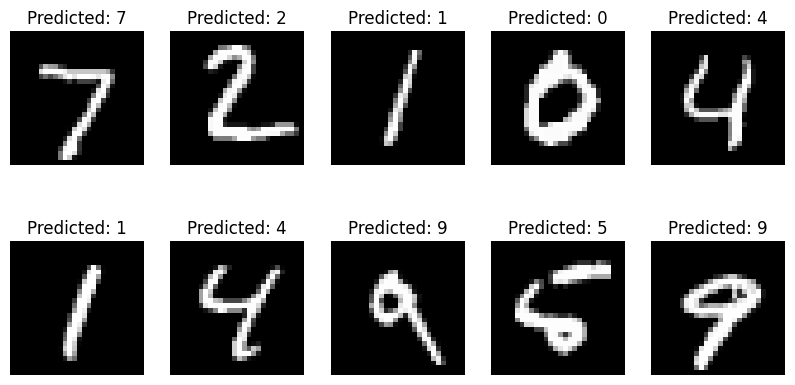

In [13]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

In [14]:
from PIL import Image
import numpy as np
from PIL import ImageOps

def binarize_image(image):
    # Convert image to binary (black and white)
    threshold = 120  # Can be adjusted if needed
    img = image.point(lambda p: p > threshold and 255)
    return img

def invert_colors(img_array):
    # Invert pixel values
    img_array = np.invert(img_array)
    return img_array

def add_padding(img_array, padding=4):
    # Add padding around the image
    img_padded = np.pad(img_array, pad_width=padding, mode='constant', constant_values=0)
    return img_padded

def preprocess_image(image_path):
    # Open the image file
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = ImageOps.invert(img)  # Invert colors (optional)

    # Binarize and normalize the image
    img = binarize_image(img)
    img = np.array(img) / 255.0  # Convert to a NumPy array and normalize pixel values to [0, 1]

    # Resize to 28x28 pixels if needed
    img = Image.fromarray(img).resize((28, 28))

    # Convert the resized image back to a NumPy array
    img = np.array(img)

    # Reshape the array to add batch dimension (1, 28, 28)
    img = img.reshape(1, 28, 28)
    return img



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 9


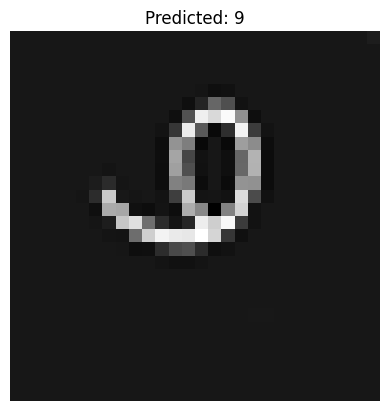

In [24]:
import matplotlib.pyplot as plt
# Provide the path to your image file
image_path = '/content/IMG_1602.jpeg'
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)
print(f'Predicted Digit: {predicted_digit}')

plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_digit}')
plt.axis('off')
plt.show()